In [5]:
# uv init
# uv pip install ipykernel #for vscode
# %uv pip install numpy pandas matplotlib seaborn


In [6]:
# data seems to be organize in CSV files without extensions
# with the header line and columns of data. Classical pandas DataFrame format

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
def load_data(file_path):
    """
    Load data from a CSV file without an extension and format column names.
    
    Parameters:
    file_path (str): Path to the CSV file.
    
    Returns:
    pd.DataFrame: DataFrame containing the loaded data with formatted column names.
    """
    try:
        data = pd.read_csv(file_path, header=0)
        # Remove leading/trailing spaces and replace internal spaces with underscores
        data.columns = [col.strip().replace(' ', '_') for col in data.columns]
        return data
    except Exception as e:
        print(f"Error loading data from {file_path}: {e}")
        return None

In [16]:
df = load_data('data/64X24X28 X=1 Z=1 bf=44p5 16')  # Replace 'data.csv' with your actual file path

In [17]:
df.columns

Index(['nodenumber', 'x-coordinate', 'y-coordinate', 'z-coordinate',
       'pressure', 'x-velocity', 'y-velocity', 'turb-kinetic-energy',
       'turb-diss-rate', 'viscosity-turb'],
      dtype='object')

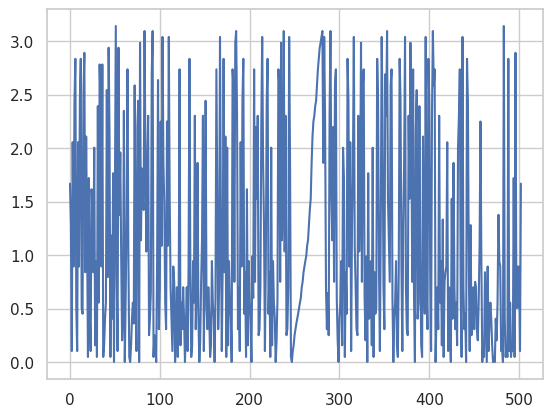

In [28]:
plt.plot(df['x-coordinate'].unique())

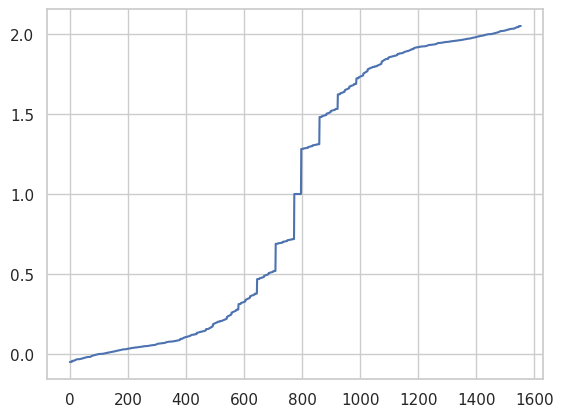

In [29]:
plt.plot(df['y-coordinate'].unique())

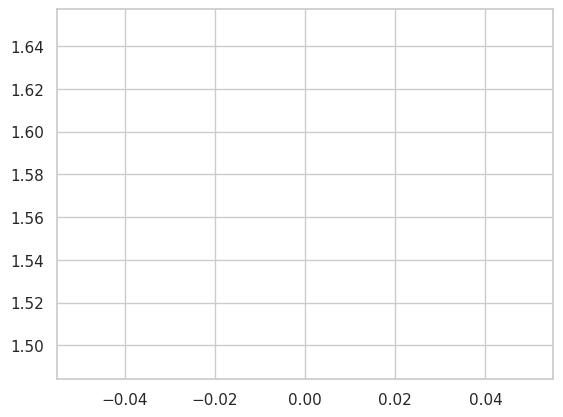

In [30]:
plt.plot(df['z-coordinate'].unique())

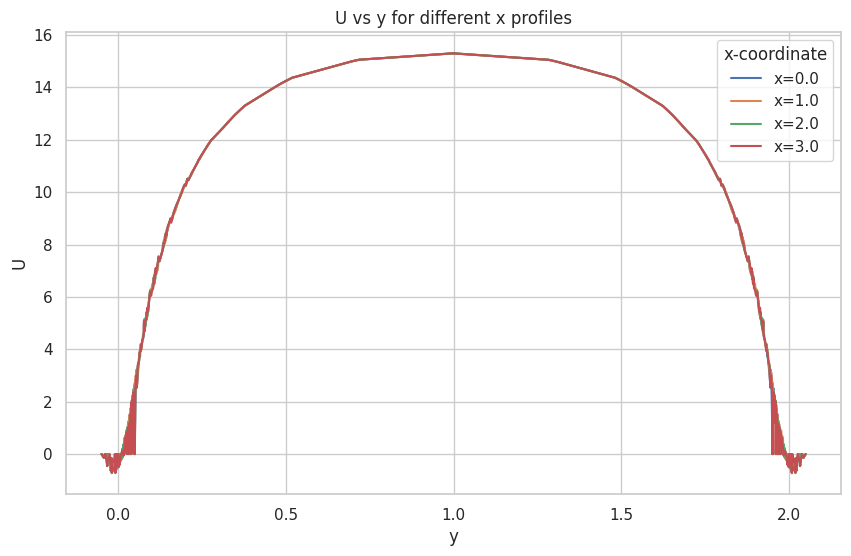

In [32]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

# Rename columns for plotting
df_plot = df.rename(columns={'y-coordinate': 'y', 'x-coordinate': 'x', 'x-velocity': 'U'})

# Group by rounded x to 1 decimal place and plot U vs y for each group
df_plot['x_rounded'] = df_plot['x'].round(0)
for x_val in sorted(df_plot['x_rounded'].unique()):
    subset = df_plot[df_plot['x_rounded'] == x_val]
    sns.lineplot(x='y', y='U', data=subset, label=f'x={x_val:.1f}')

plt.title('U vs y for different x profiles')
plt.xlabel('y')
plt.ylabel('U')
plt.legend(title='x-coordinate')
plt.show()